In [16]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
pd.set_option('max_rows',50)
pd.set_option("precision",2)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16))
import scipy.stats as stats
import re

<Figure size 1296x1152 with 0 Axes>

In [6]:
df = pd.read_excel('df.xlsx')

In [7]:
df

,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,other- heart,other- respiratory,other-general,other-nervous,other-tertalogy,PM-VSD,RHD,Diabetes1,Diabetes2,hypertension1,hypertension2,hypertension3,other,AMBULANCE,TRANSFERRED,ALERT,ELECTIVE,Ln(Total Cost),IMPLANT,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,AGE
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,13.40,1,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,660293.0,25,12,13,38000,58.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,13.60,1,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,809130.0,41,20,21,39690,59.0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,12.80,0,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,362231.0,18,9,9,0,82.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,13.35,1,80.0,173,122,110.0,80.0,24,11.8,74.0,1.5,629990.0,14,13,1,89450,46.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,13.01,0,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,444876.0,24,12,12,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12.60,1,69.0,176,62,130.0,90.0,24,13.2,26.0,1.1,295155.0,10,3,7,35000,51.0
244,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,12.21,1,57.0,159,58,100.0,70.0,24,10.6,15.0,0.8,200321.0,11,2,9,26000,58.0
245,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,12.16,0,58.0,159,68,150.0,90.0,24,15.2,23.0,0.9,191188.0,13,5,8,0,44.0
246,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,12.22,0,65.0,165,98,100.0,60.0,17,14.5,36.0,1.0,202807.0,9,6,3,0,60.0


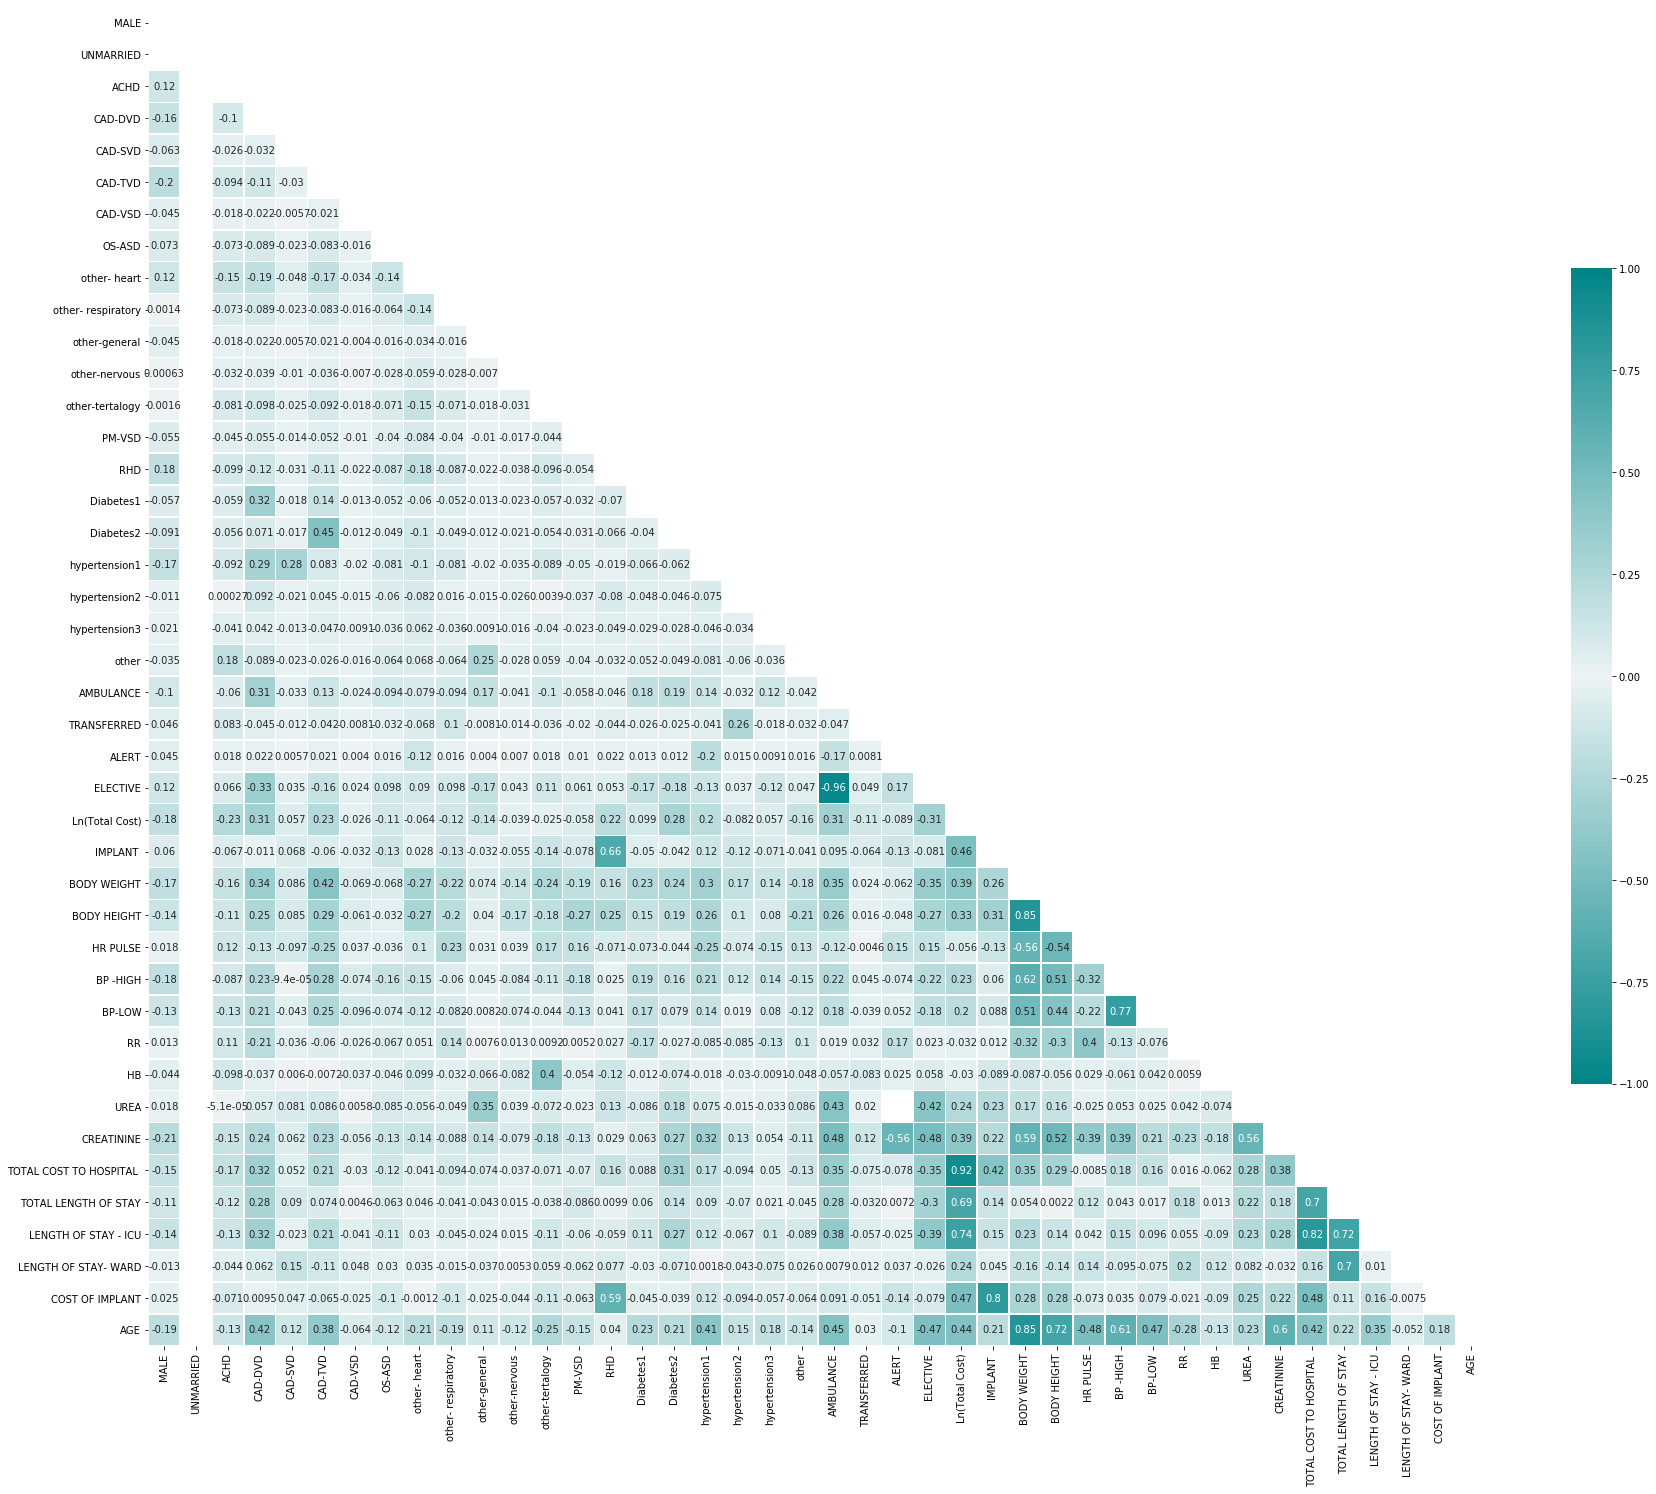

In [14]:
f, ax = plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(195, 195, s=100, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot.png")

In [17]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 50))

Top Absolute Correlations
AMBULANCE                ELECTIVE                   0.96
Ln(Total Cost)           TOTAL COST TO HOSPITAL     0.92
BODY WEIGHT              BODY HEIGHT                0.85
                         AGE                        0.85
TOTAL COST TO HOSPITAL   LENGTH OF STAY - ICU       0.82
IMPLANT                  COST OF IMPLANT            0.80
BP -HIGH                 BP-LOW                     0.77
Ln(Total Cost)           LENGTH OF STAY - ICU       0.74
TOTAL LENGTH OF STAY     LENGTH OF STAY - ICU       0.72
BODY HEIGHT              AGE                        0.72
TOTAL COST TO HOSPITAL   TOTAL LENGTH OF STAY       0.70
TOTAL LENGTH OF STAY     LENGTH OF STAY- WARD       0.70
Ln(Total Cost)           TOTAL LENGTH OF STAY       0.69
RHD                      IMPLANT                    0.66
BODY WEIGHT              BP -HIGH                   0.62
BP -HIGH                 AGE                        0.61
CREATININE               AGE                        0.60
RHD  

In [23]:
df['BMI'] = (df['BODY WEIGHT']*10000)/ (df['BODY HEIGHT']*df['BODY HEIGHT'])

In [61]:
 df[df['BMI']<10]

,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,other- heart,other- respiratory,other-general,other-nervous,other-tertalogy,PM-VSD,RHD,Diabetes1,Diabetes2,hypertension1,hypertension2,hypertension3,other,AMBULANCE,TRANSFERRED,ALERT,ELECTIVE,Ln(Total Cost),IMPLANT,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,AGE,BMI
113,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12.09,0,4.90,71,104,100.0,60.0,24,11.5,47.0,0.5,178398.0,12,3,9,0,9.00,9.72
157,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,11.25,0,2.02,45,120,NaN,NaN,32,18.8,27.0,0.5,77241.0,7,1,6,0,0.03,9.98


In [59]:
df.describe()

,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,other- heart,other- respiratory,other-general,other-nervous,other-tertalogy,PM-VSD,RHD,Diabetes1,Diabetes2,hypertension1,hypertension2,hypertension3,other,AMBULANCE,TRANSFERRED,ALERT,ELECTIVE,Ln(Total Cost),IMPLANT,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,AGE,BMI
count,248.00,248.0,248.00,248.00,2.48e+02,248.0,2.48e+02,248.00,248.00,248.00,2.48e+02,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.0,248.00,248.00,248.00,225.00,225.00,248.00,246.00,235.00,215.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00
mean,0.33,0.0,0.08,0.11,8.06e-03,0.1,4.03e-03,0.06,0.22,0.06,4.03e-03,0.01,0.07,0.02,0.10,0.04,0.04,0.09,0.05,0.02,0.06,0.12,0.02,1.00,0.87,12.06,0.2,37.52,130.22,92.23,115.02,71.88,23.54,12.89,26.58,0.75,198723.33,11.61,3.48,8.15,8544.20,28.88,23.32
std,0.47,0.0,0.27,0.31,8.96e-02,0.3,6.35e-02,0.24,0.42,0.24,6.35e-02,0.11,0.26,0.15,0.31,0.20,0.19,0.29,0.22,0.14,0.24,0.33,0.13,0.06,0.34,0.51,0.4,23.12,39.17,20.31,22.54,15.31,3.84,3.08,16.00,0.55,122587.49,5.39,3.85,3.76,21521.88,25.90,30.23
min,0.00,0.0,0.00,0.00,0.00e+00,0.0,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.74,0.0,2.02,19.00,41.00,70.00,39.00,12.00,5.00,2.00,0.10,46093.00,3.00,0.00,0.00,0.00,0.03,9.72
25%,0.00,0.0,0.00,0.00,0.00e+00,0.0,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,11.79,0.0,15.00,105.00,78.00,100.00,60.00,22.00,11.30,18.00,0.30,131652.75,8.00,1.00,6.00,0.00,6.00,14.06
50%,0.00,0.0,0.00,0.00,0.00e+00,0.0,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,12.00,0.0,40.90,147.50,90.00,110.00,70.00,24.00,12.35,22.00,0.70,162660.50,10.00,2.00,7.00,0.00,15.50,17.95
75%,1.00,0.0,0.00,0.00,0.00e+00,0.0,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,12.30,0.0,58.25,160.00,104.00,130.00,80.00,24.00,14.00,30.00,1.00,220614.00,13.00,4.00,10.00,0.00,55.00,23.08
max,1.00,0.0,1.00,1.00,1.00e+00,1.0,1.00e+00,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,13.70,1.0,85.00,185.00,155.00,215.00,140.00,42.00,25.70,143.00,5.20,887350.00,41.00,30.00,22.00,196848.00,88.00,404.43


Text(0.5, 1.0, 'BMI')

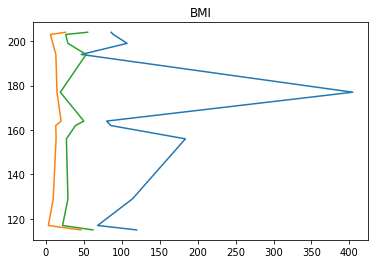

In [45]:
plt.plot(out['BMI'], out['BMI'].index)
plt.plot(out['BODY WEIGHT'], out['BODY WEIGHT'].index)
plt.plot(out['BODY HEIGHT'], out['BODY HEIGHT'].index)
plt.title('BMI')
#plt.savefig('BMI.png')

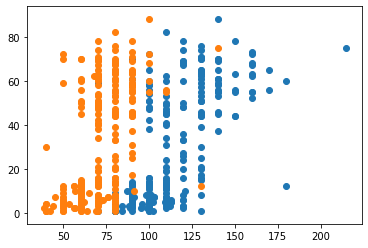

In [71]:
plt.scatter(df['BP -HIGH'],df['AGE'])


/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


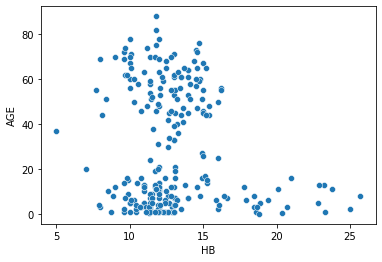

In [90]:
sns.scatterplot(df['HB'],df['AGE'])
#plt.savefig('Creatine')

In [74]:
df[df['BP -HIGH']>180]

,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,other- heart,other- respiratory,other-general,other-nervous,other-tertalogy,PM-VSD,RHD,Diabetes1,Diabetes2,hypertension1,hypertension2,hypertension3,other,AMBULANCE,TRANSFERRED,ALERT,ELECTIVE,Ln(Total Cost),IMPLANT,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,AGE,BMI
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,12.83,0,45.0,140,130,215.0,140.0,42,11.8,29.0,1.0,372357.0,31,9,22,0,75.0,22.96


In [231]:
df.columns

Index(['MALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD', 'CAD-VSD',
       'OS-ASD', 'other- heart', 'other- respiratory', 'other-general',
       'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD', 'Diabetes1',
       'Diabetes2', 'hypertension1', 'hypertension2', 'hypertension3', 'other',
       'AMBULANCE', 'TRANSFERRED', 'ALERT', 'ELECTIVE', 'Ln(Total Cost)',
       'IMPLANT ', 'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH',
       'BP-LOW', 'RR', 'HB', 'UREA', 'CREATININE', 'TOTAL COST TO HOSPITAL ',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'COST OF IMPLANT', 'AGE', 'BMI'],
      dtype='object')

In [247]:

df_clean = df[df['BMI']<40]
df_clean = df_clean.drop(['BODY WEIGHT','BODY HEIGHT','ELECTIVE','IMPLANT ',
                         'TOTAL COST TO HOSPITAL ','LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD'], axis=1)
df_clean = df_clean[df_clean['UREA'] >10]
df_clean[df_clean['CREATININE'] <5]

,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,other- heart,other- respiratory,other-general,other-nervous,other-tertalogy,PM-VSD,RHD,Diabetes1,Diabetes2,hypertension1,hypertension2,hypertension3,other,AMBULANCE,TRANSFERRED,ALERT,Ln(Total Cost),HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,COST OF IMPLANT,AGE,BMI
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13.40,118,100.0,80.0,32,11.4,33.0,0.8,25,38000,58.0,19.22
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13.60,78,70.0,50.0,28,11.4,95.0,1.7,41,39690,59.0,17.07
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,12.80,100,110.0,80.0,20,11.8,15.0,0.8,18,0,82.0,17.33
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,13.35,122,110.0,80.0,24,11.8,74.0,1.5,14,89450,46.0,26.73
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,13.01,72,180.0,100.0,18,10.0,48.0,1.9,24,0,60.0,18.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12.60,62,130.0,90.0,24,13.2,26.0,1.1,10,35000,51.0,22.28
244,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,12.21,58,100.0,70.0,24,10.6,15.0,0.8,11,26000,58.0,22.55
245,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,12.16,68,150.0,90.0,24,15.2,23.0,0.9,13,0,44.0,22.94
246,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,12.22,98,100.0,60.0,17,14.5,36.0,1.0,9,0,60.0,23.88


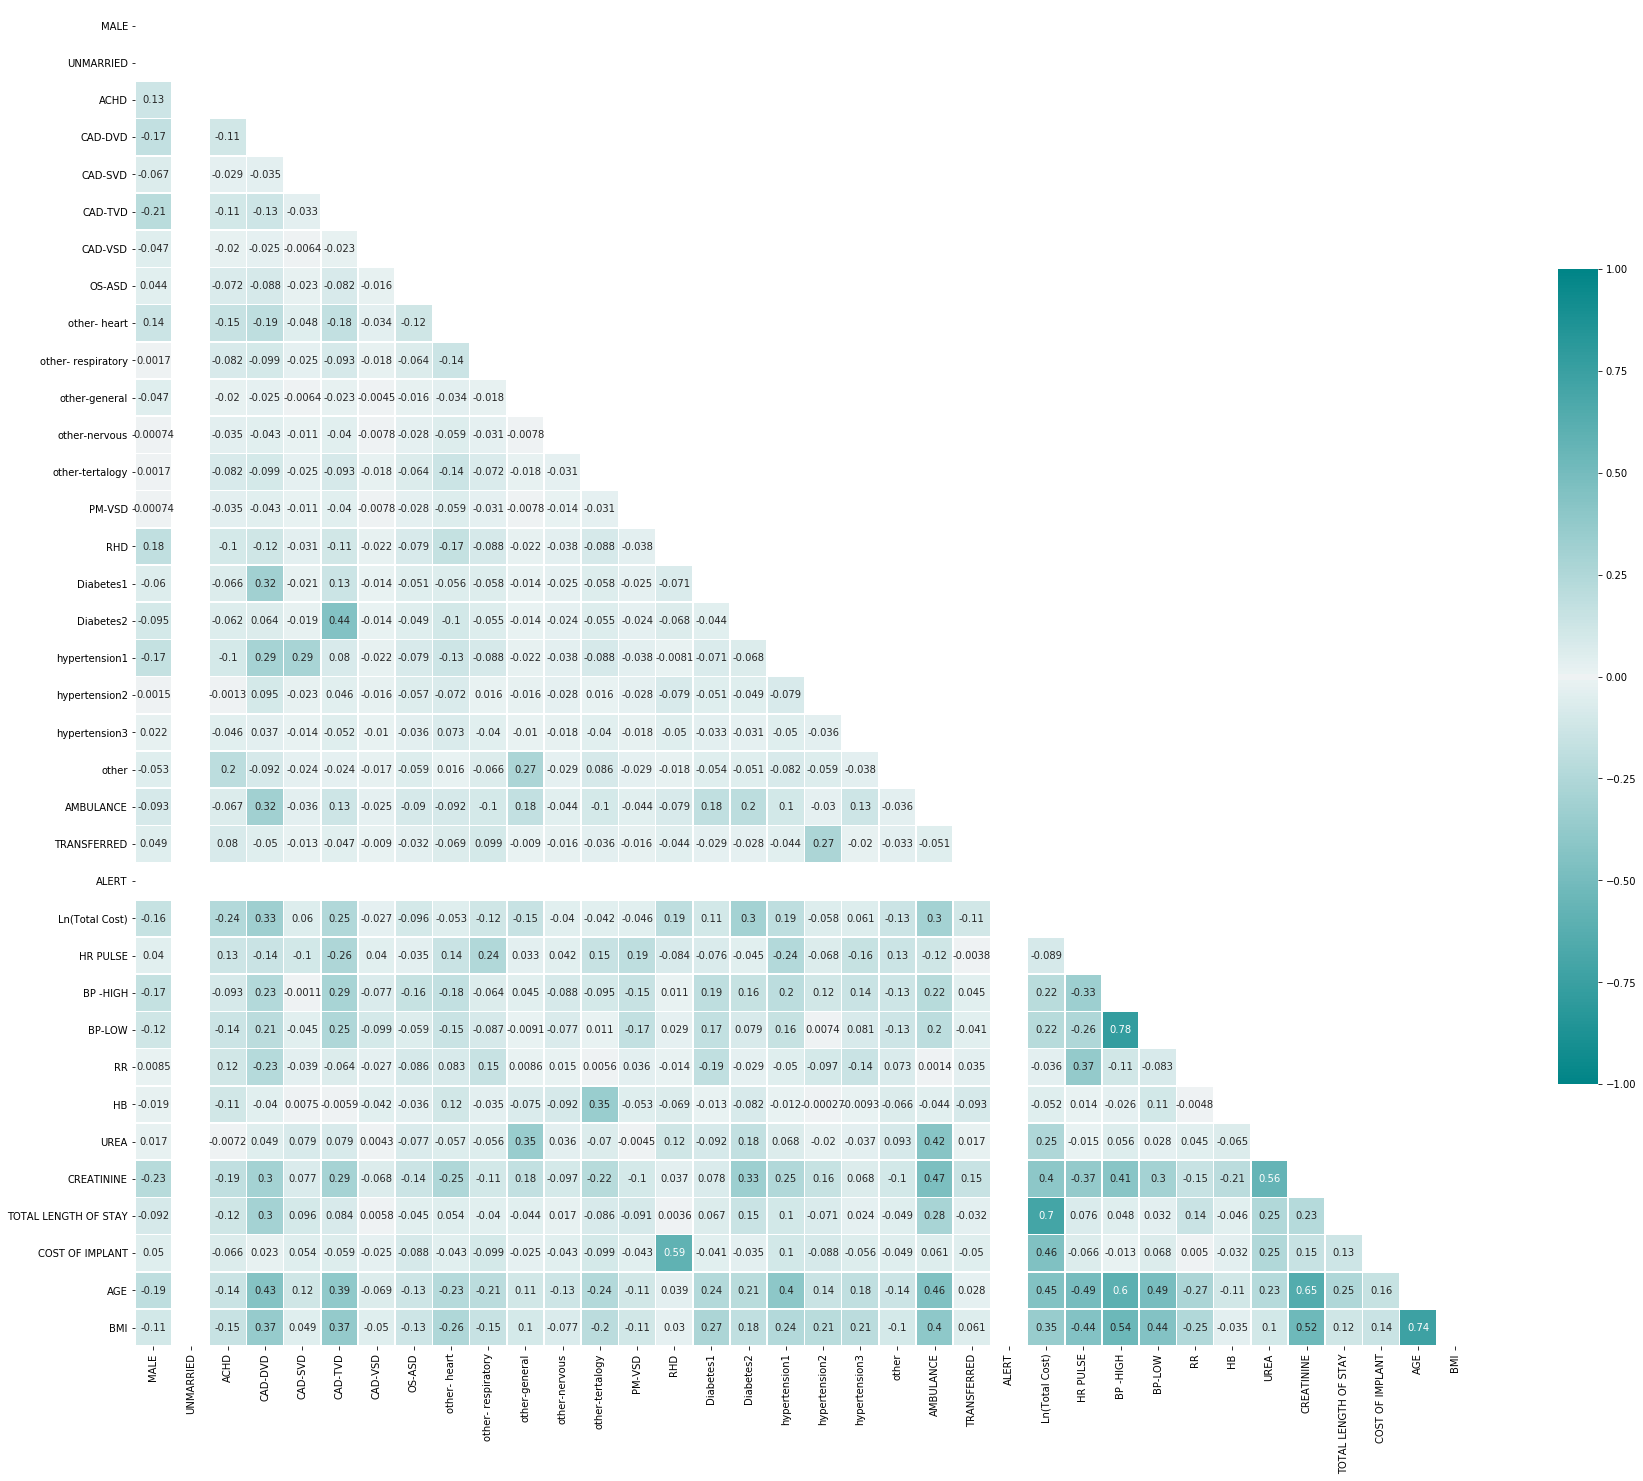

In [233]:
f, ax = plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(195, 195, s=100, as_cmap=True)
mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool))
sns.heatmap(df_clean.corr(), mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot.png")

In [248]:
## Which columns have nan's
nan_values = df_clean.isna()
nan_columns = nan_values.any()
columns_with_nan = df_clean.columns[nan_columns].tolist()
print(columns_with_nan)

['BP -HIGH', 'BP-LOW', 'CREATININE']


In [249]:
df_clean = df_clean.dropna()

In [250]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(['Ln(Total Cost)'],axis=1)
y = df_clean['Ln(Total Cost)']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3,random_state=109)

In [242]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

feat_names = X.columns
rf = RandomForestRegressor()
rf.fit(X, y)
feat_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(195, 195, s=100, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot(feat_imp[0], feat_imp[1],palette="crest")

plt.savefig("Feature Imp.png")

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [251]:
df_clean = df_clean[list(feat_imp[1])]
df_clean ['Ln(Total Cost)'] = y

ValueError: continuous is not supported